# Annotation Dataset Preparation

This notebook performs the following steps: 

1. <b>Load Data</b>
   - Load the ```.gpkg``` files that were crawled directly from the twitter archive database (2022 UK random dataset and 2020-2021 California wildfire dataset)

2. <b>Match Columns and Turn GeoPandas into Pandas DataFrame</b>
   - Select only the relevant columns from the Californian dataset so that both datasets can be merged
   - Turn the GeoPandas into Pandas 

3. <b>Draw Random Samples</b>
   - Sample 3000 tweets from the random UK dataset
   - Sample 1000 tweets from the Californian dataset

4. <b>Format to .JSONL File</b>
   - Keep only the relevant columns for the Doccano Labeling application
   - Write data to .jsonl file

5. <b>Show Statistics about the Datasets for Documentation</b>
   - Print out date ranges 
   - Create plots for both datasets (to show the geographical spread)




### Setup

In [1]:
# ------------- General Data Handling ---------------------------------
import pandas as pd                                                     # Powerful data structures for data analysis, time series, and statistics
import csv                                                              # A python 3 CSV module for handling CSV data
import json                                                             # A python package for JSON data format handling
import numpy as np                                                      # The fundamental package for scientific computing with Python

# ------------- Geographic/ Mapping Libraries --------------------------
import geopandas as gpd                                                 # Geographic pandas extension
from shapely.geometry import Point, Polygon, shape                      # creating geospatial data
from shapely import wkb, wkt                                            # creating and parsing geospatial data
import shapely                                                          # Manipulation and analysis of geometric objects in the Cartesian plane
import fiona 

# ------------- Plotting Data ------------------------------------------
import seaborn as sns; sns.set(style="ticks", color_codes=True)         # Statistical data visualization
import contextily                                                       # Context geo-tiles in Python                                    


### Load Data

In [2]:
from osgeo import gdal
print(gdal.__version__)
print(gdal.GetDriverByName('GPKG'))

3.7.3
<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x00000276865B6130> >


In [3]:
# the notebook doesn't have permission to access the files located in the below folder:
# rand = gpd.read_file("Data/Training Data/0 - Raw Input Data for Annotations/0 - Datasets from which the Annotation Data is Sampled/tweet_sample_en.gpkg")
# cali = gpd.read_file("Data/Training Data/0 - Raw Input Data for Annotations/0 - Datasets from which the Annotation Data is Sampled/tweets_cawildfires_2022.gpkg")

rand = gpd.read_file(r"C:\Users\chris\Documents\Thesis\Back-Up from University Folder\1 - Code\ABEA Repo_ excl Data\Data\Training Data\0 - Raw Input Data for Annotations\0 - Datasets from which the Annotation Data is Sampled\tweet_sample_en.gpkg")
cali = gpd.read_file(r"C:\Users\chris\Documents\Thesis\Back-Up from University Folder\1 - Code\ABEA Repo_ excl Data\Data\Training Data\0 - Raw Input Data for Annotations\0 - Datasets from which the Annotation Data is Sampled\tweets_cawildfires_2022.gpkg")

In [4]:
rand.sample(10)

,message_id,date,text,tags,tweet_lang,geometry
13112,1322965854787719168,2020-11-01 18:16:53+00:00,@Dazzla84_SSFC @Lambpix1 @Ollie_Bayliss Al FA ...,None,en,"POLYGON ((0.23045 51.40162, 0.23045 51.41744, ..."
24029,1356293267235680258,2021-02-01 17:28:08+00:00,@cjfaison All the time !! 😂,None,en,"POLYGON ((-0.52098 51.61804, -0.52098 51.62772..."
7954,1322870025775140865,2020-11-01 11:56:06+00:00,@SpitfireAudio Sounds beautiful. Congratulatio...,None,en,"POLYGON ((0.24415 51.43882, 0.24415 51.45631, ..."
5613,1322812115598585856,2020-11-01 08:05:59+00:00,@thecharleslloyd Stay safe. Charles !,None,en,"POLYGON ((-0.10061 51.68107, -0.10061 51.75558..."
6731,1322837339266318336,2020-11-01 09:46:13+00:00,"Just posted a photo @ Lambeth, South London ht...",None,en,POINT (-0.13007 51.47790)
21415,1311579293449940992,2020-10-01 08:10:46+00:00,How many times a year you sweep the Buildings ...,None,en,"POLYGON ((-0.10061 51.68107, -0.10061 51.75558..."
16203,1323011848032129025,2020-11-01 21:19:39+00:00,@LastWordOnSpurs Won’t even come close.,None,en,"POLYGON ((-0.07455 51.41409, -0.07455 51.49413..."
23603,1323362966528495621,2020-11-02 20:34:52+00:00,"@NaturaEmporium Thanks Nichola, I've bee...n b...",CreativeBizHour,en,"POLYGON ((0.41209 51.50640, 0.41209 51.54594, ..."
24504,1323381262380388354,2020-11-02 21:47:34+00:00,@goodallgeorgiaa Both great but Apple superior...,None,en,"POLYGON ((-0.16175 51.29433, -0.16175 51.42353..."
13842,1322977233678573569,2020-11-01 19:02:06+00:00,Our ‘Mo’ don’t dive 🔴⚪️,None,en,"POLYGON ((-0.11143 51.77990, -0.11143 51.81332..."


In [5]:
cali.sample(10)

,message_id,date,text,tags,tweet_lang,source,place,retweets,tweet_favorites,photo_url,...,user_location,followers,friends,user_favorites,status,user_lang,latitude,longitude,disaster_related,geometry
4252,1569052539064143872,2022-09-11 19:57:31,It’s a smoky 9/11. #mosquitofire #911memorial ...,"mosquitofire,911memorial",en,"<a href=""http://instagram.com"" rel=""nofollow"">...","California, USA",0,0,None,...,"Reno, NV",231,406,10513,5328,None,NaN,NaN,1,POINT (-120.34015 39.34182)
15344,1562961588411256832,2022-08-26 00:34:15,There is an active brush fire to the east abov...,None,en,"<a href=""http://twitter.com/download/iphone"" r...","Arcadia, CA",0,0,None,...,"Arcadia, CA",1315,291,292,696,None,NaN,NaN,1,"POLYGON ((-118.06946 34.08706, -118.06946 34.1..."
14370,1567148091010334722,2022-09-06 13:49:55,Many horse ranches near Fairview fire in Hemet. 🐎,None,en,"<a href=""http://twitter.com/download/android"" ...","Menifee, CA",0,0,None,...,"San Marcos, CA",353,1225,1609,562,None,NaN,NaN,1,"POLYGON ((-117.25807 33.61832, -117.25807 33.7..."
10425,1542873233518604289,2022-07-01 14:10:18,"Fireworks in Petaluma are totally banned, incl...",None,en,"<a href=""http://twitter.com/download/android"" ...","Petaluma, CA",0,0,None,...,"Petaluma, CA",491,487,5151,2571,None,NaN,NaN,1,"POLYGON ((-122.68238 38.20531, -122.68238 38.2..."
4270,1533107268249563136,2022-06-04 15:23:51,2 Bank Robberies yesterday. 1 in Grand Terrace...,Fail,en,"<a href=""http://twitter.com/download/iphone"" r...","Redlands, CA",0,0,None,...,"Riverside, CA",2953,4953,29963,60841,None,NaN,NaN,1,"POLYGON ((-117.24374 34.00385, -117.24374 34.1..."
11969,1544193559946936320,2022-07-05 05:36:49,@nbcbayarea #Residential #Fire now 2 alarm! #...,"Residential,Fire,SanJose,EastSide",en,"<a href=""http://twitter.com/download/android"" ...","Campbell, CA",0,0,None,...,"Bay Area, California",2107,1802,67682,9072,None,NaN,NaN,1,"POLYGON ((-121.99173 37.25467, -121.99173 37.3..."
9994,1573702287935119363,2022-09-24 15:53:58,LACoFD-9 | E. LA / El Monte Commercial Fire re...,"lacofd,lacofdalert",en,"<a href=""https://lait911.com"" rel=""nofollow"">L...","East Los Angeles, CA",0,0,None,...,Los Angeles County,147,2,0,2032,None,NaN,NaN,1,POINT (-118.16382 34.02176)
5880,1549472128218476544,2022-07-19 19:11:57,@edwinaarschot @VICENews Article says the fire...,None,en,"<a href=""http://twitter.com/download/iphone"" r...","Berkeley, CA",0,0,None,...,"Berkeley, CA, United States",445,445,6648,4039,None,NaN,NaN,1,"POLYGON ((-122.32482 37.84595, -122.32482 37.9..."
12357,1544718075978727427,2022-07-06 16:21:03,LACoFD-6 | Inglewood / S. LA Residential Fire ...,"lacofd,lacofdalert",en,"<a href=""https://lait911.com"" rel=""nofollow"">L...","Huntington Park, CA",0,0,None,...,Los Angeles County,22,2,0,626,None,NaN,NaN,1,POINT (-118.20836 33.97992)
11181,1540494476799508480,2022-06-25 00:37:58,LAFD-West Structure Fire reported at S Mt Sina...,"lafd,lafdalert",en,"<a href=""https://help.twitter.com/en/using-twi...","Los Angeles, CA",0,0,None,...,Los Angeles,181,94,73,3308,None,NaN,NaN,1,POINT (-118.31832 34.15220)


In [6]:
print(len(rand))
print(len(cali))

25000
16336


In [7]:
rand.columns

Index(['message_id', 'date', 'text', 'tags', 'tweet_lang', 'geometry'], dtype='object')

In [8]:
cali.columns

Index(['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place',
       'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id',
       'user_id', 'user_name', 'user_location', 'followers', 'friends',
       'user_favorites', 'status', 'user_lang', 'latitude', 'longitude',
       'disaster_related', 'geometry'],
      dtype='object')

### Match Columns and Turn GeoPandas into Pandas DataFrame

In [9]:
cali = cali[['message_id', 'date', 'text', 'tags', 'tweet_lang', 'geometry']]

In [10]:
cali_df = pd.DataFrame(cali)

In [11]:
rand_df = pd.DataFrame(rand)

### Draw Random Samples

In [12]:
output_file = rand_df.sample(3000)
cali_add = cali_df.sample(1000)
output = pd.concat([output_file, cali_add], axis=0)

In [13]:
output.head()

,message_id,date,text,tags,tweet_lang,geometry
18106,1323259260944482305,2020-11-02 13:42:47+00:00,@jamescracknell Love it @jamescracknell we hav...,None,en,"POLYGON ((-0.50772 51.70824, -0.50772 51.71408..."
23478,1323360017773404163,2020-11-02 20:23:09+00:00,@oGototheS Even the big ones are.,None,en,"POLYGON ((-0.11033 51.26134, -0.11033 51.32205..."
17481,1323031596329541632,2020-11-01 22:38:07+00:00,@Peter_brads85 Isn’t it paid advertising? I’ve...,None,en,"POLYGON ((-0.03336 51.74962, -0.03336 51.78063..."
17889,1323254044425682950,2020-11-02 13:22:03+00:00,"@Geddli_ Actually, I prefer ""Tank Respecter,"" ...",None,en,"POLYGON ((-0.17025 51.56459, -0.17025 51.61122..."
1167,1314198222491930626,2020-10-08 13:37:27+00:00,@DVLAgovuk Pop in to @PeabodyLDN #PemburyEstat...,"PemburyEstate,justsaying",en,"POLYGON ((-0.10450 51.51861, -0.10450 51.57668..."


In [14]:
# shuffle 
output = output.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
# check that it's the correct output length
print(len(output))

4000


### Format to .JSONL File

In [16]:
output.to_csv("tweets_for_annotating.csv")

In [17]:
# read CSV to change into JSONL
csv_file = 'tweets_for_annotating.csv'

# Columns needed to be included in Doccano file format to annotations
text_column = 'text'
message_id = 'message_id'
label = ' '


jsonl_file = 'output.jsonl'

with open(csv_file, mode='r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)

    with open(jsonl_file, mode='w', encoding='utf-8') as jsonl:
        for row in csv_reader:
            # Construct the dictionary
            data = {
                "text": row[text_column],
                "label": " ",
                "message_id": row[message_id]
            }
            # Write to JSONL file
            jsonl.write(json.dumps(data) + '\n')

### Show Statistics about the Datasets for Documentation

In [18]:
# CALIFORNIA DATASET

# Ensure the "date" column is in datetime format
cali['date'] = pd.to_datetime(cali['date'])

# Find the minimum and maximum dates
min_date = cali['date'].min()
max_date = cali['date'].max()

# Print the overall date range
print(f"The overall date range is from {min_date} to {max_date}.")

print(len(cali))

The overall date range is from 2022-01-01 00:00:27 to 2022-09-30 23:49:55.
16336


In [19]:
# RANODM UK DATASET

en = rand

# Ensure the "date" column is in datetime format
en['date'] = pd.to_datetime(en['date'])

# Find the minimum and maximum dates
min_date = en['date'].min()
max_date = en['date'].max()

# Print the overall date range
print(f"The overall date range is from {min_date} to {max_date}.")

print(len(en))

The overall date range is from 2020-09-01 08:15:03+00:00 to 2021-02-28 22:21:48+00:00.
25000


#### Geographical Spread

In [20]:
# Create a new column called "geom_type" which shows whether the data is a point or polygon
cali['geom_type'] = cali['geometry'].apply(lambda x: x.geom_type)
en['geom_type'] = en['geometry'].apply(lambda x: x.geom_type)

In [21]:
# Iterate over each row in the geodataframe using a for-loop
for row in range(0, len(cali)):

    # If-condition to check if the row['geom_type'] is a Polygon
    if (cali.at[row, 'geom_type'] == 'Polygon'):

        # Get the centroid of the polygon
        centroid = cali.at[row, 'geometry'].centroid

        # Create a new Point geometry from the centroid
        point_geom = centroid

        # Update the geometry of the row with the new Point geometry
        cali.at[row, 'geometry'] = point_geom

        # Update the geom_type of the row to 'Point'
        cali.at[row, 'geom_type'] = 'Point'


# Iterate over each row in the geodataframe using a for-loop
for row in range(0, len(en)):

    # If-condition to check if the row['geom_type'] is a Polygon
    if (en.at[row, 'geom_type'] == 'Polygon'):

        # Get the centroid of the polygon
        centroid = en.at[row, 'geometry'].centroid

        # Create a new Point geometry from the centroid
        point_geom = centroid

        # Update the geometry of the row with the new Point geometry
        en.at[row, 'geometry'] = point_geom

        # Update the geom_type of the row to 'Point'
        en.at[row, 'geom_type'] = 'Point'




In [22]:
# Check the geometry types again to make sure we successfully converted all polygons to points
print(cali.geom_type.value_counts())

print(en.geom_type.value_counts())

Point    16336
Name: count, dtype: int64
Point    25000
Name: count, dtype: int64


In [23]:
# Define new columns for latitude and longitude
cali['lat'] = cali['geometry'].apply(lambda x : x.y if x else np.nan)
cali['lon'] = cali['geometry'].apply(lambda x : x.x if x else np.nan)

en['lat'] = en['geometry'].apply(lambda x : x.y if x else np.nan)
en['lon'] = en['geometry'].apply(lambda x : x.x if x else np.nan)

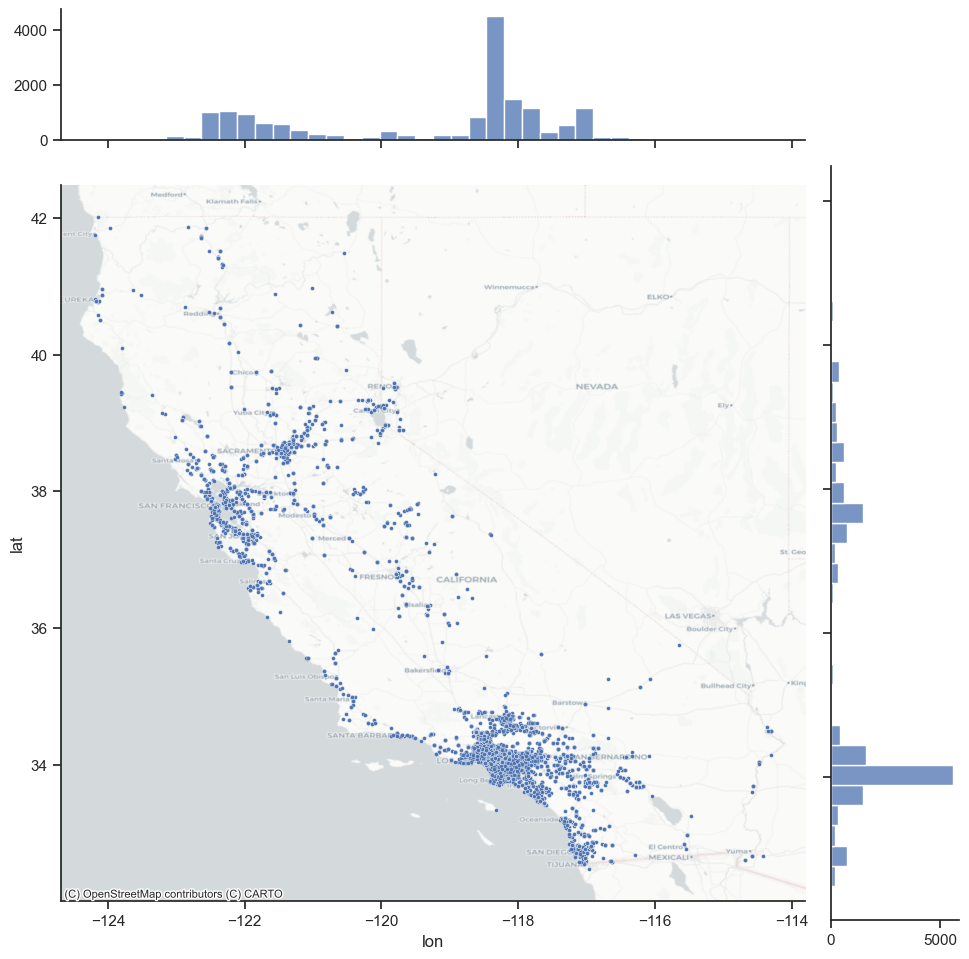

In [24]:
# Generate a jointplot with a base map to show spatial distribution
joint_axes = sns.jointplot(
    x=cali["lon"], # specify the longitude column of the dataset
    y=cali["lat"], # specify the latitude column of the dataset
    data=cali, # specify the dataset to be plotted
    s=8,
    height=10, # Increased height for a larger plot
    ratio=5,  # ratio controls size of the bar charts on top and right
    marginal_ticks=True # specify the size of the point markers (in numeric terms, e.g. 3)
)

contextily.add_basemap(
    joint_axes.ax_joint, # join the basemap with the plot
    crs='EPSG:4326', # specify the coordinate reference system (should be the same as your data)
    source=contextily.providers.CartoDB.Positron # the style of the base map (but you can change it if you like)
)


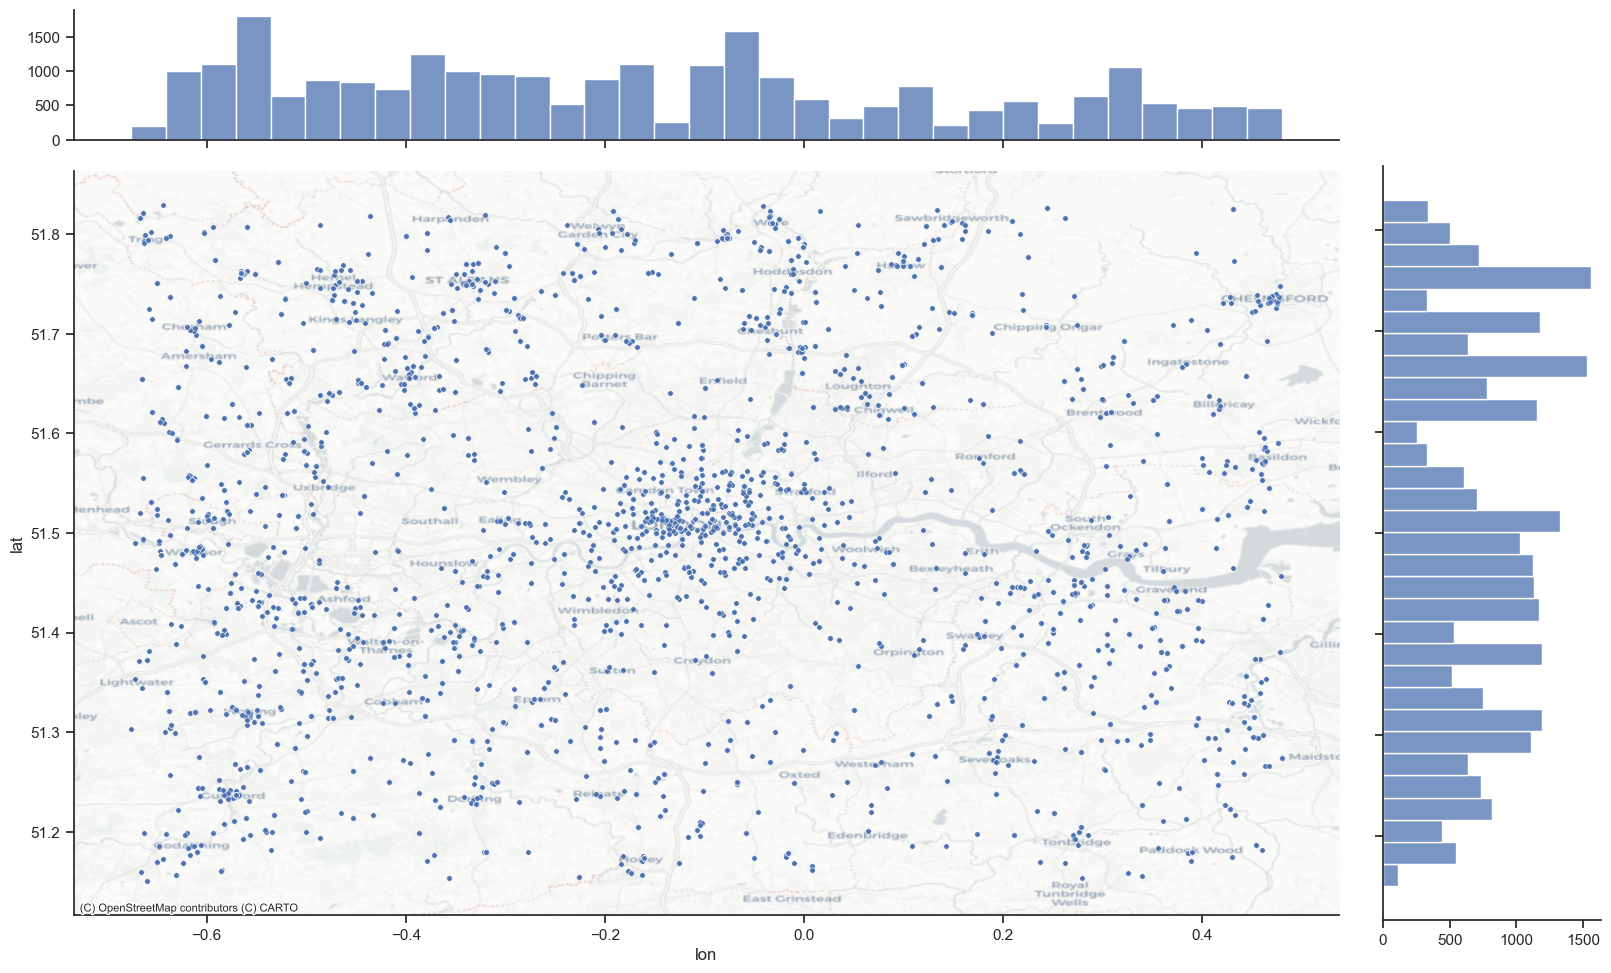

In [25]:
# Generate a jointplot with a base map to show spatial distribution
joint_axes = sns.jointplot(
    x=en["lon"], # specify the longitude column of the dataset
    y=en["lat"], # specify the latitude column of the dataset
    data=en, # specify the dataset to be plotted
    s=15,
    height=10, # Increased height for a larger plot
    ratio=5,  # ratio controls size of the bar charts on top and right
    marginal_ticks=True # specify the size of the point markers (in numeric terms, e.g. 3)
)

# Calculate aspect ratio of the data
lon_range = en['lon'].max() - en['lon'].min()
lat_range = en['lat'].max() - en['lat'].min()
aspect_ratio = lon_range / lat_range

# Adjust the size of the figure to maintain aspect ratio
joint_axes.fig.set_size_inches(10 * aspect_ratio, 10)

# Calculate the extent of the basemap
extent = [
    en['lon'].min(), en['lon'].max(),
    en['lat'].min(), en['lat'].max()
]

contextily.add_basemap(
    joint_axes.ax_joint, # join the basemap with the plot
    crs='EPSG:4326', # specify the coordinate reference system (should be the same as your data)
    source=contextily.providers.CartoDB.Positron, # the style of the base map (but you can change it if you like)
    # extent=extent # set the extent of the basemap
)
